# Data Science 1 Project - Airline Passenger Satisfaction Classification 

### Domitila Desai (UIN: 671456629)
### Samarth Lingaraju (UIN: 657711452) 
### Rahul Hegde (UIN: 654949024)


In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("data_project.csv")
data

,number,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
data_sample = data.sample(n=5000)

In [11]:
data.iloc[12886]

number                                         12886
id                                             22358
Gender                                        Female
Customer_Type                         Loyal Customer
Age                                               35
Type_of_Travel                       Business travel
Class                                            Eco
Flight_Distance                                  238
Inflight_wifi_service                              3
Departure_Arrival_time_convenient                  2
Ease_of_Online_booking                             2
Gate_location                                      2
Food_and_drink                                     3
Online_boarding                                    3
Seat_comfort                                       3
Inflight_entertainment                             3
On_board_service                                   4
Leg_room_service                                   2
Baggage_handling                              

# ABOUT THE DATASET

In [4]:
display(data.head()), data.shape

,number,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


(None, (103904, 25))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   number                             103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure_Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [6]:
df = data_sample.copy()
# Identify and drop our target variable 'Sales' from dataframe, isolating our independent variables
X = df.drop(columns=['number','id'])

# Isolate our dependent variable as a feature
#y = df.satisfaction

#drop na and duplicates
X.drop_duplicates(inplace = True)
X.dropna(inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4985 entries, 36702 to 17954
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4985 non-null   object 
 1   Customer_Type                      4985 non-null   object 
 2   Age                                4985 non-null   int64  
 3   Type_of_Travel                     4985 non-null   object 
 4   Class                              4985 non-null   object 
 5   Flight_Distance                    4985 non-null   int64  
 6   Inflight_wifi_service              4985 non-null   int64  
 7   Departure_Arrival_time_convenient  4985 non-null   int64  
 8   Ease_of_Online_booking             4985 non-null   int64  
 9   Gate_location                      4985 non-null   int64  
 10  Food_and_drink                     4985 non-null   int64  
 11  Online_boarding                    4985 non-null   

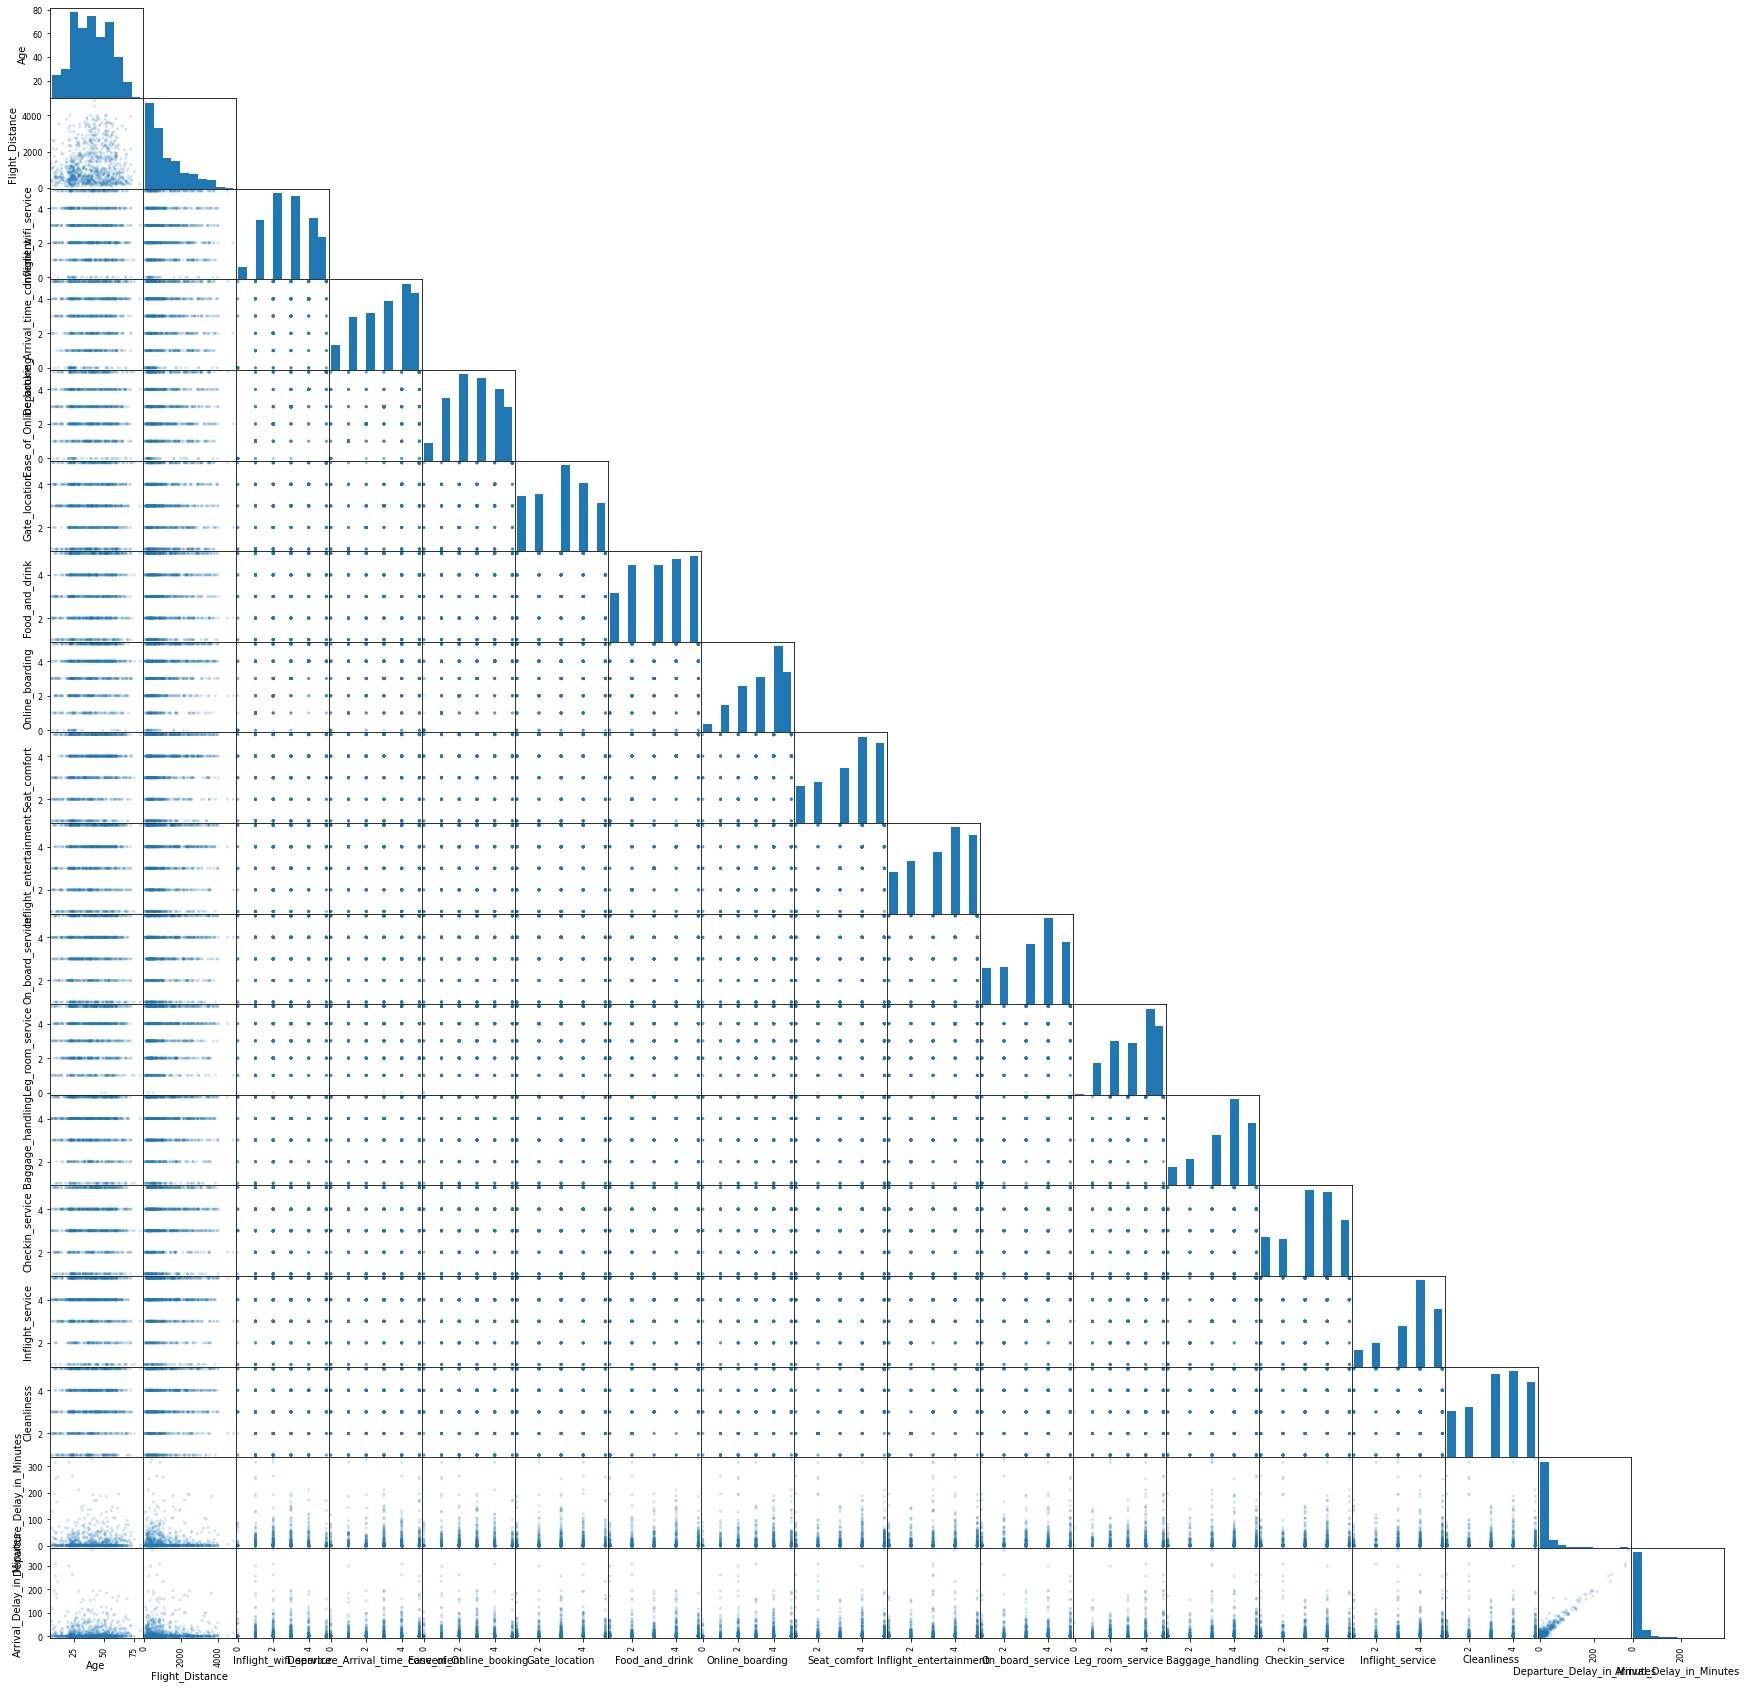

In [7]:
axes = pd.plotting.scatter_matrix(X.sample(n=1000), alpha=0.2, figsize=(30,30))

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)

# DATA CLEANING

In [7]:
# Select all data excluding 'object' to isolate numeric data
X_numeric = X.select_dtypes(exclude = 'object')

# Set numeric dataframe columns
X_numeric_cols = X_numeric.columns
X_numeric.columns = X_numeric_cols
X_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 32731 to 14458
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4989 non-null   int64  
 1   Flight_Distance                    4989 non-null   int64  
 2   Inflight_wifi_service              4989 non-null   int64  
 3   Departure_Arrival_time_convenient  4989 non-null   int64  
 4   Ease_of_Online_booking             4989 non-null   int64  
 5   Gate_location                      4989 non-null   int64  
 6   Food_and_drink                     4989 non-null   int64  
 7   Online_boarding                    4989 non-null   int64  
 8   Seat_comfort                       4989 non-null   int64  
 9   Inflight_entertainment             4989 non-null   int64  
 10  On_board_service                   4989 non-null   int64  
 11  Leg_room_service                   4989 non-null   

In [8]:
X_numeric.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
32731,13,602,2,1,1,1,2,2,3,2,1,1,4,1,3,2,10,10.0
95012,20,414,3,0,2,4,2,3,4,3,2,4,4,4,5,4,169,172.0
20905,43,2367,3,3,3,3,2,5,5,5,5,5,5,5,5,3,6,3.0
12886,35,238,3,2,2,2,3,3,3,3,4,2,3,5,3,3,0,0.0
89072,11,888,3,4,3,4,3,3,3,3,5,4,4,4,4,3,17,11.0


In [9]:
# Perform standard scaling on our numeric data

from sklearn.preprocessing import StandardScaler
from scipy import stats

# Instantiate a standard scaler object
ss = StandardScaler()

# Fit and transform our numeric data to the ss object
X_numeric = pd.DataFrame(ss.fit_transform(X_numeric))
X_numeric.set_index(X.index, inplace = True)

X_numeric.columns = X_numeric_cols
X_numeric.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,-1.818906,-1.789599,0.307858,-1.770947,-0.524725,-0.996210,-0.119171,-0.131689
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,-1.042111,0.477428,0.307858,0.555549,1.161492,0.534933,3.375301,3.389343
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,1.288275,1.233104,1.155486,1.331047,1.161492,-0.230638,-0.207082,-0.283833
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,0.511480,-1.033923,-0.539771,1.331047,-0.524725,-0.230638,-0.338949,-0.349037
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,1.288275,0.477428,0.307858,0.555549,0.318384,-0.230638,0.034674,-0.109955


In [10]:
# Select only categorical data types
X_cat = X.select_dtypes(include = 'object')
X_cat.head()
X_cat.columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

In [11]:
# Utilize LabelBinarizer to deal with binary data
# Will convert features with binary values to integer values of 0 or 1
from sklearn.preprocessing import LabelBinarizer

# Create a binarizer object for each binary categorical variable
Gender_bin = LabelBinarizer()
Customer_Type_bin = LabelBinarizer()
Type_of_Travel_bin=LabelBinarizer()
satisfaction_bin=LabelBinarizer()

# Fit and transform each respective binary cat variable to their respective binarizer objects
X_cat.Gender = Gender_bin.fit_transform(X_cat.Gender)
X_cat.Customer_Type = Customer_Type_bin.fit_transform(X_cat.Customer_Type)
X_cat.Type_of_Travel = Type_of_Travel_bin.fit_transform(X_cat.Type_of_Travel)
X_cat.satisfaction = satisfaction_bin.fit_transform(X_cat.satisfaction)

X_cat.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
32731,1,0,0,Eco Plus,0
95012,0,1,0,Eco,0
20905,1,0,0,Business,1
12886,0,0,0,Eco,1
89072,1,0,1,Eco,0


In [12]:
# Use pd.get_dummies to create new binary features and drop_first to ensure there is no autocorrelation

X_cat_prepped = X_cat.merge(pd.get_dummies(X_cat.Class, drop_first = False),
                                  left_index = True, right_index =True)
X_cat_prepped.drop('Class', axis = 1, inplace = True)
X_cat_prepped.head()

,Gender,Customer_Type,Type_of_Travel,satisfaction,Business,Eco,Eco Plus
32731,1,0,0,0,0,0,1
95012,0,1,0,0,0,1,0
20905,1,0,0,1,1,0,0
12886,0,0,0,1,0,1,0
89072,1,0,1,0,0,1,0


In [13]:
# Merge numerical data and categorical data
X_prep = pd.merge(X_numeric,X_cat_prepped, left_index = True, right_index = True)
X_prep.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,satisfaction,Business,Eco,Eco Plus
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,...,-0.996210,-0.119171,-0.131689,1,0,0,0,0,0,1
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,...,0.534933,3.375301,3.389343,0,1,0,0,0,1,0
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,...,-0.230638,-0.207082,-0.283833,1,0,0,1,1,0,0
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,...,-0.230638,-0.338949,-0.349037,0,0,0,1,0,1,0
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,...,-0.230638,0.034674,-0.109955,1,0,1,0,0,1,0


In [14]:
y=X_prep.satisfaction
X_prep1=X_prep.drop(columns=['satisfaction'])
X_prep1

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,...,-0.524725,-0.996210,-0.119171,-0.131689,1,0,0,0,0,1
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,...,1.161492,0.534933,3.375301,3.389343,0,1,0,0,1,0
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,...,1.161492,-0.230638,-0.207082,-0.283833,1,0,0,1,0,0
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,...,-0.524725,-0.230638,-0.338949,-0.349037,0,0,0,0,1,0
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,...,0.318384,-0.230638,0.034674,-0.109955,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,0.116843,1.398542,-0.558888,-0.716554,-0.550025,-0.772009,1.347980,-0.193399,0.420884,1.237964,...,1.161492,0.534933,-0.338949,-0.283833,1,0,0,1,0,0
59849,0.850672,-0.669337,-0.558888,-1.372738,-0.550025,-0.772009,-1.663696,-0.929378,-0.337163,-1.009290,...,-1.367833,0.534933,1.946744,1.694031,1,0,0,1,0,0
25441,0.850672,0.829126,-1.306220,-1.372738,-0.550025,-1.555323,1.347980,0.542580,1.178930,0.488880,...,0.318384,0.534933,-0.338949,-0.349037,1,0,0,1,0,0
34558,-2.151357,-0.574434,-1.306220,0.595813,-1.261847,-1.555323,-0.910777,-1.665356,-1.095210,-1.009290,...,-1.367833,-0.996210,0.056652,-0.153424,0,0,1,0,1,0


# PRELIMINARY DATA ANALYSIS

In [15]:
import statsmodels.api as sm
y=X_prep.satisfaction

X =X_prep1
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:31:01   Log-Likelihood:                -1692.4
No. Observations:                4989   AIC:                             3433.
Df Residuals:                    4965   BIC:                             3589.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [16]:
from statsmodels.formula.api import ols
model=ols('satisfaction~Gender + Customer_Type + Type_of_Travel + Business + Eco + Age + Flight_Distance + Inflight_wifi_service + Departure_Arrival_time_convenient + Ease_of_Online_booking + Gate_location + Food_and_drink + Online_boarding + Seat_comfort + Inflight_entertainment + On_board_service + Leg_room_service + Baggage_handling + Checkin_service + Inflight_service + Cleanliness + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes',data=X_prep).fit()
aov_table=sm.stats.anova_lm(model,type=2)

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,0.141179,0.141179,1.217607,2.698843e-01
Customer_Type,1.0,45.869655,45.869655,395.604386,9.230749e-85
Type_of_Travel,1.0,333.543367,333.543367,2876.655998,0.000000e+00
Business,1.0,51.454080,51.454080,443.767444,1.990447e-94
Eco,1.0,0.394026,0.394026,3.398287,6.532371e-02
Age,1.0,0.101751,0.101751,0.877557,3.489171e-01
Flight_Distance,1.0,0.502965,0.502965,4.337834,3.732537e-02
Inflight_wifi_service,1.0,65.762380,65.762380,567.169859,8.496474e-119
Departure_Arrival_time_convenient,1.0,7.194492,7.194492,62.049140,4.085179e-15
Ease_of_Online_booking,1.0,7.189160,7.189160,62.003151,4.180501e-15


In [17]:
#predictor-predictor correlations
X_prep1.corr().round(6)

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus
Age,1.000000,0.099454,0.038450,0.038571,0.038938,-0.001719,0.026448,0.225289,0.165857,0.062206,...,-0.063559,0.045058,-0.006616,-0.008631,0.007392,-0.282090,-0.050797,0.136040,-0.131440,-0.009580
Flight_Distance,0.099454,1.000000,0.015543,-0.008678,0.084320,0.015211,0.085356,0.213292,0.168858,0.146188,...,0.053398,0.103262,0.023882,0.021611,0.014291,-0.230546,-0.262376,0.465553,-0.401886,-0.126254
Inflight_wifi_service,0.038450,0.015543,1.000000,0.350293,0.722304,0.318904,0.142419,0.466957,0.130645,0.234517,...,0.113026,0.137041,-0.022531,-0.018118,0.002837,-0.003625,-0.116380,0.039029,-0.040699,0.003082
Departure_Arrival_time_convenient,0.038571,-0.008678,0.350293,1.000000,0.434255,0.438647,0.022060,0.074283,0.014342,-0.000635,...,0.053819,0.019305,-0.003691,-0.006998,0.010596,-0.193466,0.263335,-0.093289,0.066360,0.052938
Ease_of_Online_booking,0.038938,0.084320,0.722304,0.434255,1.000000,0.435160,0.044663,0.436728,0.054768,0.079187,...,0.030045,0.039501,-0.010699,-0.009558,-0.008481,-0.017092,-0.146731,0.117003,-0.107405,-0.019242
Gate_location,-0.001719,0.015211,0.318904,0.438647,0.435160,1.000000,-0.000934,0.008542,0.008215,0.010233,...,-0.004526,-0.003763,-0.006489,-0.009790,-0.008187,-0.005378,-0.030135,-0.006585,0.010052,-0.006731
Food_and_drink,0.026448,0.085356,0.142419,0.022060,0.044663,-0.000934,1.000000,0.234152,0.552531,0.613929,...,0.015396,0.653000,-0.031784,-0.033263,0.007673,-0.090428,-0.035405,0.088021,-0.084169,-0.007907
Online_boarding,0.225289,0.213292,0.466957,0.074283,0.436728,0.008542,0.234152,1.000000,0.412966,0.281524,...,0.046153,0.324700,-0.029072,-0.027107,-0.064992,-0.185280,-0.241767,0.332949,-0.289298,-0.086622
Seat_comfort,0.165857,0.168858,0.130645,0.014342,0.054768,0.008215,0.552531,0.412966,1.000000,0.590628,...,0.057002,0.666709,-0.034052,-0.030504,-0.030952,-0.170043,-0.125345,0.238084,-0.207007,-0.061676
Inflight_entertainment,0.062206,0.146188,0.234517,-0.000635,0.079187,0.010233,0.613929,0.281524,0.590628,1.000000,...,0.400587,0.676232,-0.042809,-0.044318,0.007220,-0.129758,-0.142426,0.201557,-0.175621,-0.051485


In [18]:
X_prep.corr().round(6)

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,satisfaction,Business,Eco,Eco Plus
Age,1.000000,0.099454,0.038450,0.038571,0.038938,-0.001719,0.026448,0.225289,0.165857,0.062206,...,0.045058,-0.006616,-0.008631,0.007392,-0.282090,-0.050797,0.146276,0.136040,-0.131440,-0.009580
Flight_Distance,0.099454,1.000000,0.015543,-0.008678,0.084320,0.015211,0.085356,0.213292,0.168858,0.146188,...,0.103262,0.023882,0.021611,0.014291,-0.230546,-0.262376,0.306466,0.465553,-0.401886,-0.126254
Inflight_wifi_service,0.038450,0.015543,1.000000,0.350293,0.722304,0.318904,0.142419,0.466957,0.130645,0.234517,...,0.137041,-0.022531,-0.018118,0.002837,-0.003625,-0.116380,0.285313,0.039029,-0.040699,0.003082
Departure_Arrival_time_convenient,0.038571,-0.008678,0.350293,1.000000,0.434255,0.438647,0.022060,0.074283,0.014342,-0.000635,...,0.019305,-0.003691,-0.006998,0.010596,-0.193466,0.263335,-0.048365,-0.093289,0.066360,0.052938
Ease_of_Online_booking,0.038938,0.084320,0.722304,0.434255,1.000000,0.435160,0.044663,0.436728,0.054768,0.079187,...,0.039501,-0.010699,-0.009558,-0.008481,-0.017092,-0.146731,0.190268,0.117003,-0.107405,-0.019242
Gate_location,-0.001719,0.015211,0.318904,0.438647,0.435160,1.000000,-0.000934,0.008542,0.008215,0.010233,...,-0.003763,-0.006489,-0.009790,-0.008187,-0.005378,-0.030135,0.003039,-0.006585,0.010052,-0.006731
Food_and_drink,0.026448,0.085356,0.142419,0.022060,0.044663,-0.000934,1.000000,0.234152,0.552531,0.613929,...,0.653000,-0.031784,-0.033263,0.007673,-0.090428,-0.035405,0.188498,0.088021,-0.084169,-0.007907
Online_boarding,0.225289,0.213292,0.466957,0.074283,0.436728,0.008542,0.234152,1.000000,0.412966,0.281524,...,0.324700,-0.029072,-0.027107,-0.064992,-0.185280,-0.241767,0.488557,0.332949,-0.289298,-0.086622
Seat_comfort,0.165857,0.168858,0.130645,0.014342,0.054768,0.008215,0.552531,0.412966,1.000000,0.590628,...,0.666709,-0.034052,-0.030504,-0.030952,-0.170043,-0.125345,0.342592,0.238084,-0.207007,-0.061676
Inflight_entertainment,0.062206,0.146188,0.234517,-0.000635,0.079187,0.010233,0.613929,0.281524,0.590628,1.000000,...,0.676232,-0.042809,-0.044318,0.007220,-0.129758,-0.142426,0.394314,0.201557,-0.175621,-0.051485


In [19]:
df = pd.merge(X_prep1,X_prep.satisfaction, left_index = True, right_index = True)
df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus,satisfaction
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,...,-0.996210,-0.119171,-0.131689,1,0,0,0,0,1,0
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,...,0.534933,3.375301,3.389343,0,1,0,0,1,0,0
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,...,-0.230638,-0.207082,-0.283833,1,0,0,1,0,0,1
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,...,-0.230638,-0.338949,-0.349037,0,0,0,0,1,0,1
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,...,-0.230638,0.034674,-0.109955,1,0,1,0,1,0,0


In [20]:
#correlation matrix
#df.corr().round(6)
from IPython.display import display
pd.options.display.max_columns = None
display(df.corr().round(6))

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus,satisfaction
Age,1.000000,0.099454,0.038450,0.038571,0.038938,-0.001719,0.026448,0.225289,0.165857,0.062206,0.052252,0.054085,-0.043724,0.034711,-0.063559,0.045058,-0.006616,-0.008631,0.007392,-0.282090,-0.050797,0.136040,-0.131440,-0.009580,0.146276
Flight_Distance,0.099454,1.000000,0.015543,-0.008678,0.084320,0.015211,0.085356,0.213292,0.168858,0.146188,0.114333,0.136959,0.055539,0.067389,0.053398,0.103262,0.023882,0.021611,0.014291,-0.230546,-0.262376,0.465553,-0.401886,-0.126254,0.306466
Inflight_wifi_service,0.038450,0.015543,1.000000,0.350293,0.722304,0.318904,0.142419,0.466957,0.130645,0.234517,0.137500,0.173102,0.129015,0.022629,0.113026,0.137041,-0.022531,-0.018118,0.002837,-0.003625,-0.116380,0.039029,-0.040699,0.003082,0.285313
Departure_Arrival_time_convenient,0.038571,-0.008678,0.350293,1.000000,0.434255,0.438647,0.022060,0.074283,0.014342,-0.000635,0.066535,0.013119,0.070761,0.100654,0.053819,0.019305,-0.003691,-0.006998,0.010596,-0.193466,0.263335,-0.093289,0.066360,0.052938,-0.048365
Ease_of_Online_booking,0.038938,0.084320,0.722304,0.434255,1.000000,0.435160,0.044663,0.436728,0.054768,0.079187,0.060550,0.117258,0.048875,0.009585,0.030045,0.039501,-0.010699,-0.009558,-0.008481,-0.017092,-0.146731,0.117003,-0.107405,-0.019242,0.190268
Gate_location,-0.001719,0.015211,0.318904,0.438647,0.435160,1.000000,-0.000934,0.008542,0.008215,0.010233,-0.021515,0.001722,0.001976,-0.027710,-0.004526,-0.003763,-0.006489,-0.009790,-0.008187,-0.005378,-0.030135,-0.006585,0.010052,-0.006731,0.003039
Food_and_drink,0.026448,0.085356,0.142419,0.022060,0.044663,-0.000934,1.000000,0.234152,0.552531,0.613929,0.037600,0.033398,0.018153,0.077750,0.015396,0.653000,-0.031784,-0.033263,0.007673,-0.090428,-0.035405,0.088021,-0.084169,-0.007907,0.188498
Online_boarding,0.225289,0.213292,0.466957,0.074283,0.436728,0.008542,0.234152,1.000000,0.412966,0.281524,0.159081,0.124663,0.054788,0.182261,0.046153,0.324700,-0.029072,-0.027107,-0.064992,-0.185280,-0.241767,0.332949,-0.289298,-0.086622,0.488557
Seat_comfort,0.165857,0.168858,0.130645,0.014342,0.054768,0.008215,0.552531,0.412966,1.000000,0.590628,0.117923,0.103331,0.051638,0.179533,0.057002,0.666709,-0.034052,-0.030504,-0.030952,-0.170043,-0.125345,0.238084,-0.207007,-0.061676,0.342592
Inflight_entertainment,0.062206,0.146188,0.234517,-0.000635,0.079187,0.010233,0.613929,0.281524,0.590628,1.000000,0.412311,0.309287,0.382243,0.111721,0.400587,0.676232,-0.042809,-0.044318,0.007220,-0.129758,-0.142426,0.201557,-0.175621,-0.051485,0.394314


In [21]:
#this is our cleaned data with satisfaction,total data

df

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus,satisfaction
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,-1.818906,-1.789599,0.307858,-1.770947,-0.524725,-0.996210,-0.119171,-0.131689,1,0,0,0,0,1,0
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,-1.042111,0.477428,0.307858,0.555549,1.161492,0.534933,3.375301,3.389343,0,1,0,0,1,0,0
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,1.288275,1.233104,1.155486,1.331047,1.161492,-0.230638,-0.207082,-0.283833,1,0,0,1,0,0,1
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,0.511480,-1.033923,-0.539771,1.331047,-0.524725,-0.230638,-0.338949,-0.349037,0,0,0,0,1,0,1
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,1.288275,0.477428,0.307858,0.555549,0.318384,-0.230638,0.034674,-0.109955,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,0.116843,1.398542,-0.558888,-0.716554,-0.550025,-0.772009,1.347980,-0.193399,0.420884,1.237964,1.288275,1.233104,1.155486,-0.219950,1.161492,0.534933,-0.338949,-0.283833,1,0,0,1,0,0,1
59849,0.850672,-0.669337,-0.558888,-1.372738,-0.550025,-0.772009,-1.663696,-0.929378,-0.337163,-1.009290,-1.042111,-1.033923,-1.387399,0.555549,-1.367833,0.534933,1.946744,1.694031,1,0,0,1,0,0,1
25441,0.850672,0.829126,-1.306220,-1.372738,-0.550025,-1.555323,1.347980,0.542580,1.178930,0.488880,0.511480,0.477428,0.307858,-0.219950,0.318384,0.534933,-0.338949,-0.349037,1,0,0,1,0,0,1
34558,-2.151357,-0.574434,-1.306220,0.595813,-1.261847,-1.555323,-0.910777,-1.665356,-1.095210,-1.009290,-1.818906,-1.789599,-2.235028,1.331047,-1.367833,-0.996210,0.056652,-0.153424,0,0,1,0,1,0,0


In [22]:
# naming our x and y from cleaned datset df

X_airline=df.drop(columns=['satisfaction'])
X_airline

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Type_of_Travel,Business,Eco,Eco Plus
32731,-1.751087,-0.583425,-0.558888,-1.372738,-1.261847,-1.555323,-0.910777,-0.929378,-0.337163,-1.009290,-1.818906,-1.789599,0.307858,-1.770947,-0.524725,-0.996210,-0.119171,-0.131689,1,0,0,0,0,1
95012,-1.284105,-0.771232,0.188443,-2.028922,-0.550025,0.794618,-0.910777,-0.193399,0.420884,-0.260205,-1.042111,0.477428,0.307858,0.555549,1.161492,0.534933,3.375301,3.389343,0,1,0,0,1,0
20905,0.250266,1.179766,0.188443,-0.060370,0.161797,0.011305,-0.910777,1.278558,1.178930,1.237964,1.288275,1.233104,1.155486,1.331047,1.161492,-0.230638,-0.207082,-0.283833,1,0,0,1,0,0
12886,-0.283428,-0.947052,0.188443,-0.716554,-0.550025,-0.772009,-0.157858,-0.193399,-0.337163,-0.260205,0.511480,-1.033923,-0.539771,1.331047,-0.524725,-0.230638,-0.338949,-0.349037,0,0,0,0,1,0
89072,-1.884510,-0.297718,0.188443,0.595813,0.161797,0.794618,-0.157858,-0.193399,-0.337163,-0.260205,1.288275,0.477428,0.307858,0.555549,0.318384,-0.230638,0.034674,-0.109955,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,0.116843,1.398542,-0.558888,-0.716554,-0.550025,-0.772009,1.347980,-0.193399,0.420884,1.237964,1.288275,1.233104,1.155486,-0.219950,1.161492,0.534933,-0.338949,-0.283833,1,0,0,1,0,0
59849,0.850672,-0.669337,-0.558888,-1.372738,-0.550025,-0.772009,-1.663696,-0.929378,-0.337163,-1.009290,-1.042111,-1.033923,-1.387399,0.555549,-1.367833,0.534933,1.946744,1.694031,1,0,0,1,0,0
25441,0.850672,0.829126,-1.306220,-1.372738,-0.550025,-1.555323,1.347980,0.542580,1.178930,0.488880,0.511480,0.477428,0.307858,-0.219950,0.318384,0.534933,-0.338949,-0.349037,1,0,0,1,0,0
34558,-2.151357,-0.574434,-1.306220,0.595813,-1.261847,-1.555323,-0.910777,-1.665356,-1.095210,-1.009290,-1.818906,-1.789599,-2.235028,1.331047,-1.367833,-0.996210,0.056652,-0.153424,0,0,1,0,1,0


In [23]:
y_airline=df.satisfaction
y_airline

32731    0
95012    0
20905    1
12886    1
89072    0
        ..
7842     1
59849    1
25441    1
34558    0
14458    1
Name: satisfaction, Length: 4989, dtype: int32

# MODELS

#### LOGISTIC REGRESSION

In [25]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_airline, y_airline, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.71232877, 0.20133956, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.63013699, 0.05480008, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.42465753, 0.19261214, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.76712329, 0.35335904, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.68493151, 0.17495433, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.38356164, 0.06718084, 0.6       , ..., 1.        , 0.        ,
        0.        ]])

In [27]:
# BEFORE SCALING

clf = LogisticRegression(solver= 'liblinear').fit(X_train, y_train)
print('Accuracy of Logit classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logit classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logit classifier on training set: 0.88
Accuracy of Logit classifier on test set: 0.85


In [28]:
# AFTER SCALING

clf = LogisticRegression(solver= 'liblinear').fit(X_train_scaled, y_train)
print('Accuracy of Logit classifier on scaled training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logit classifier on scaled test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of Logit classifier on scaled training set: 0.87
Accuracy of Logit classifier on scaled test set: 0.85


In [29]:
clf.coef_

array([[-0.6644915 ,  0.17008677,  1.87925838, -0.61677223, -0.6394849 ,
         0.15309017, -0.0504604 ,  2.43386888,  0.53069572,  0.46425377,
         1.43251245,  0.93156519,  0.92099085,  1.28333481,  0.15674224,
         0.49688487, -0.94149168, -1.19600865,  0.05210191, -2.12241446,
        -2.63841488, -0.77922205, -1.44403245, -1.54293739]])

In [30]:
clf.intercept_

array([-3.76619189])

In [31]:
# Hyperparameters tuning for logistic regression

In [32]:
#using liblinear and l2 penalty with c=1
clf = LogisticRegression(penalty='l2',solver='liblinear',C=1.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [33]:
#using newton-cg and l2 penalty with c=1
clf = LogisticRegression(penalty='l2',solver='newton-cg',C=1.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [34]:
#using lbfgs and l2 penalty with c=1
clf = LogisticRegression(penalty='l2',solver='lbfgs',C=2.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [35]:
#using liblinear and l2 penalty with c=2
clf = LogisticRegression(penalty='l2',solver='liblinear',C=2.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [36]:
#using newton-cg and l2 penalty with c=2
clf = LogisticRegression(penalty='l2',solver='newton-cg',C=2.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [37]:
#using liblinear and l1 penalty with c=2
clf = LogisticRegression(penalty='l1',solver='liblinear',C=2.0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.85


In [38]:
# We can observe that the training and testing accuracy is the same even after changung the hyperparameters

#### Adding polynomial features for logistic regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
#Generate all polynomial and interaction features.


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)



In [40]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

log = LogisticRegression().fit(X_train_poly, y_train)

print('airline dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log.score(X_train_poly, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log.score(X_test_poly, y_test)))

airline dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.91


In [41]:
y_pred=log.predict(X_test_poly)

In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[640,  44],
       [ 63, 501]], dtype=int64)

In [43]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9142628205128205
Precision: 0.9192660550458716


Roc_auc_score for Logistic Regression  0.967978827091369


<IPython.core.display.Javascript object>


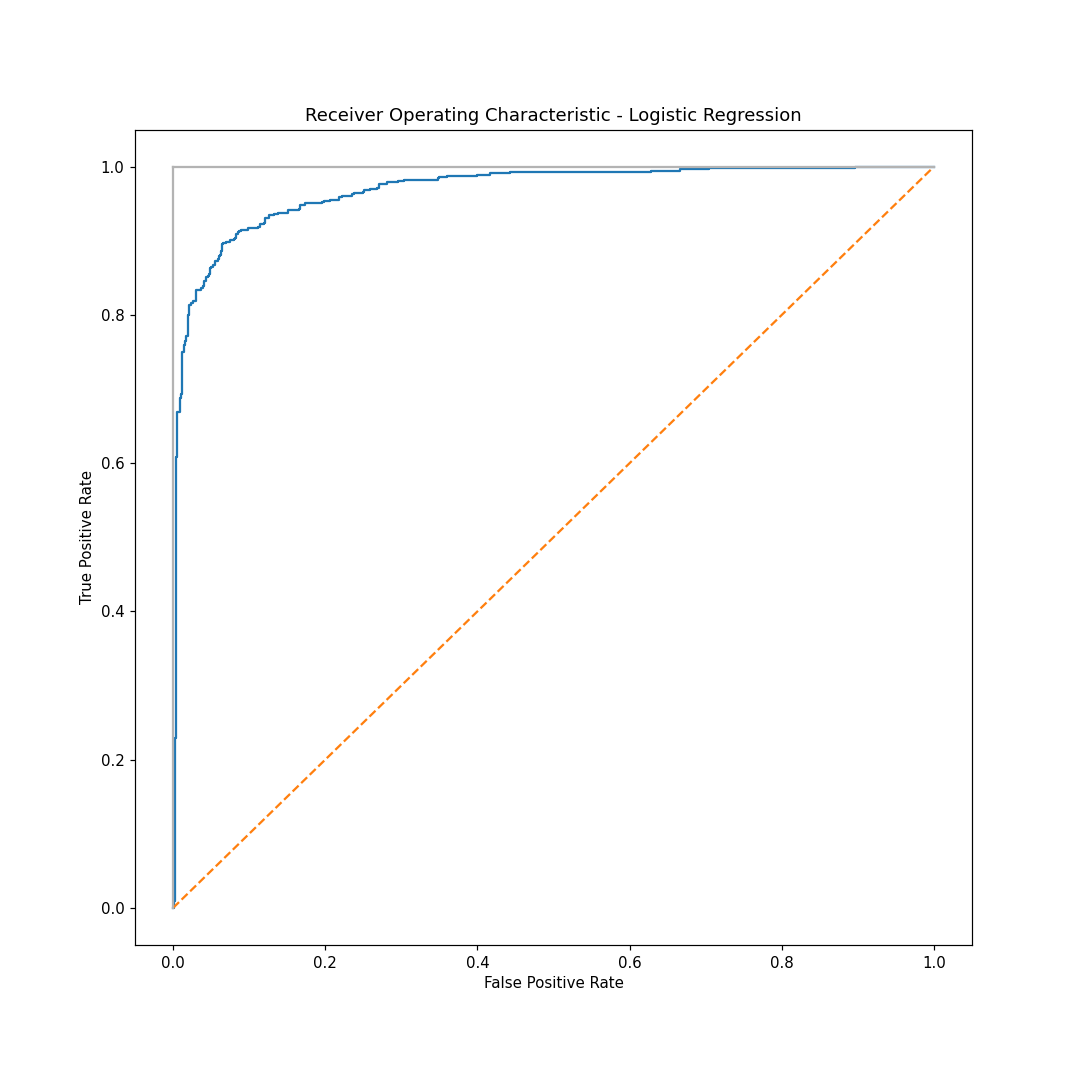

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = log.predict_proba(X_test_poly)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for Logistic Regression ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<IPython.core.display.Javascript object>


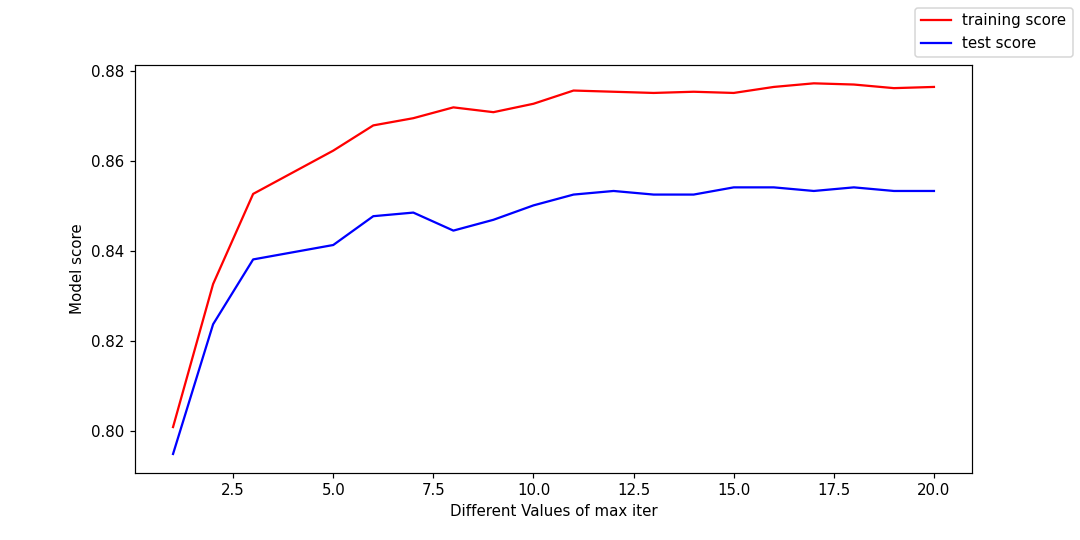

In [47]:
train_score = []
test_score = []
iter_vals = []

for i in range(1, 21):
    iter_vals.append(i)
    log = LogisticRegression(max_iter=i)
    log.fit(X_train, y_train)
    
    tr_score = log.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = log.score(X_test, y_test)
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max iter')
plt.ylabel('Model score')
plt.plot(iter_vals, train_score, color = 'r', label = "training score")
plt.plot(iter_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

#### KNN CLASSIFIER

In [48]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


In [50]:
# Packages
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_airline, y_airline, random_state=0)

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [52]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN

KNeighborsClassifier()

In [53]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


In [54]:
# Hyperparameters for KNN i.e changing different values of K

In [55]:
knn = KNeighborsClassifier(n_neighbors = 2) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.85


In [56]:
knn = KNeighborsClassifier(n_neighbors = 4 ) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


In [60]:
knn = KNeighborsClassifier(n_neighbors = 5 ) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


In [58]:
knn = KNeighborsClassifier(n_neighbors = 6 ) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.87


In [59]:
knn = KNeighborsClassifier(n_neighbors = 7 ) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.88


Roc_auc_score for KNN  0.9343647608975155


<IPython.core.display.Javascript object>


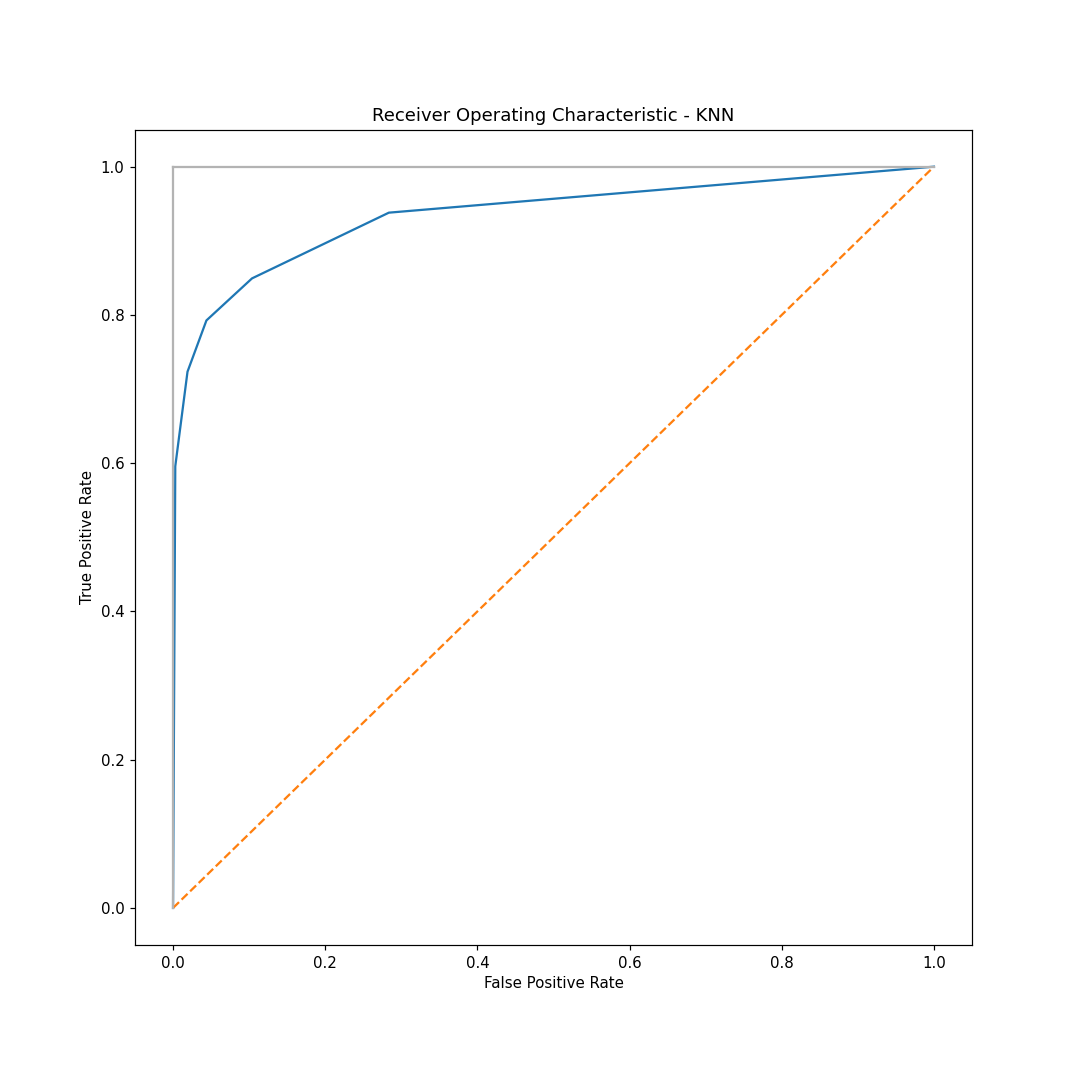

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = knn.predict_proba(X_test_scaled)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for KNN ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
y_pred=knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[626,  58],
       [210, 354]], dtype=int64)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7852564102564102
Precision: 0.8592233009708737


<IPython.core.display.Javascript object>


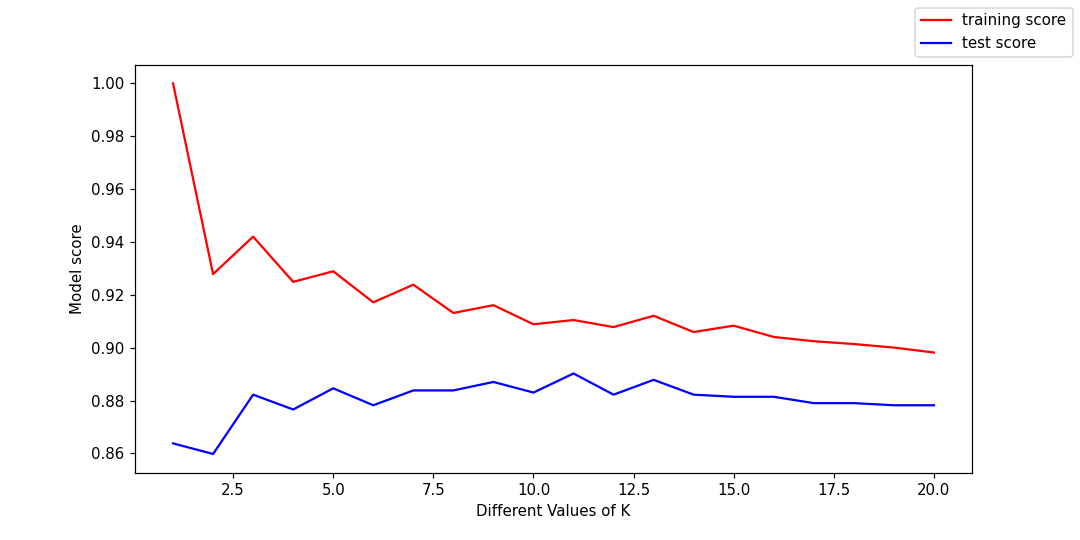

In [64]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

#### LDA 

In [65]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# define model
model = LinearDiscriminantAnalysis() #LinearDiscriminantAnalysis
model.fit(X_train, y_train) 

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print('Training Accuracy is {} and Testing Accuracy is {}'.format(score_train, score_test))

Training Accuracy is 0.8727612937717187 and Testing Accuracy is 0.8453525641025641


In [67]:
y_pred=model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[605,  79],
       [114, 450]], dtype=int64)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8453525641025641
Precision: 0.8506616257088847


Roc_auc_score for LDA  0.9001182033096927


<IPython.core.display.Javascript object>


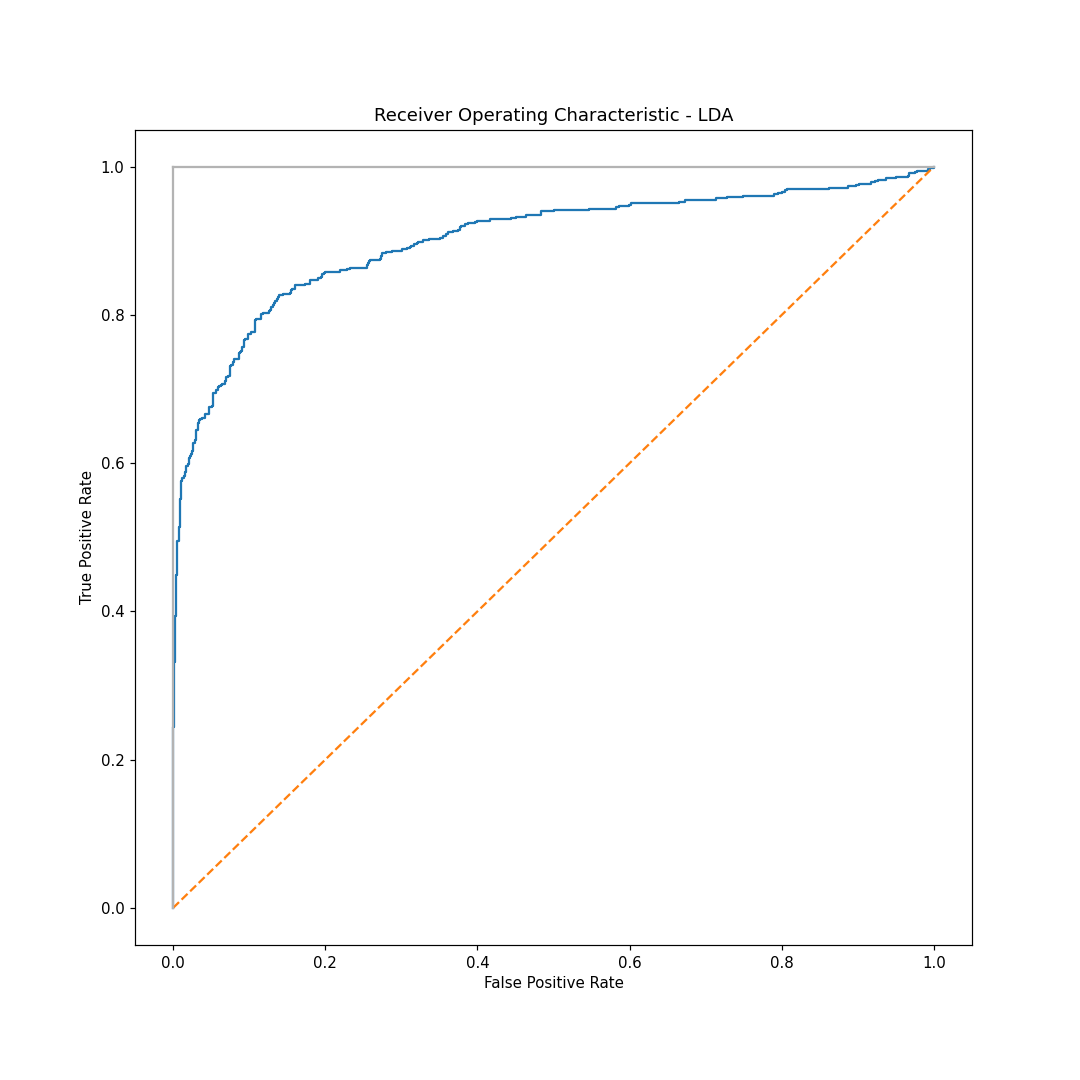

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for LDA ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LDA')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### QDA

In [70]:
model_qda = QuadraticDiscriminantAnalysis() #QuadraticDiscriminantAnalysis

model_qda.fit(X_train, y_train) 

score_train = model_qda.score(X_train, y_train)
score_test = model_qda.score(X_test, y_test)

print('Training Accuracy is {} and Testing Accuracy is {}'.format(score_train, score_test))

Training Accuracy is 0.7952419139267576 and Testing Accuracy is 0.7708333333333334


In [71]:
y_pred=model_qda.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[491, 193],
       [ 93, 471]], dtype=int64)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7708333333333334
Precision: 0.7093373493975904


Roc_auc_score for QDA  0.8447052175355647


<IPython.core.display.Javascript object>


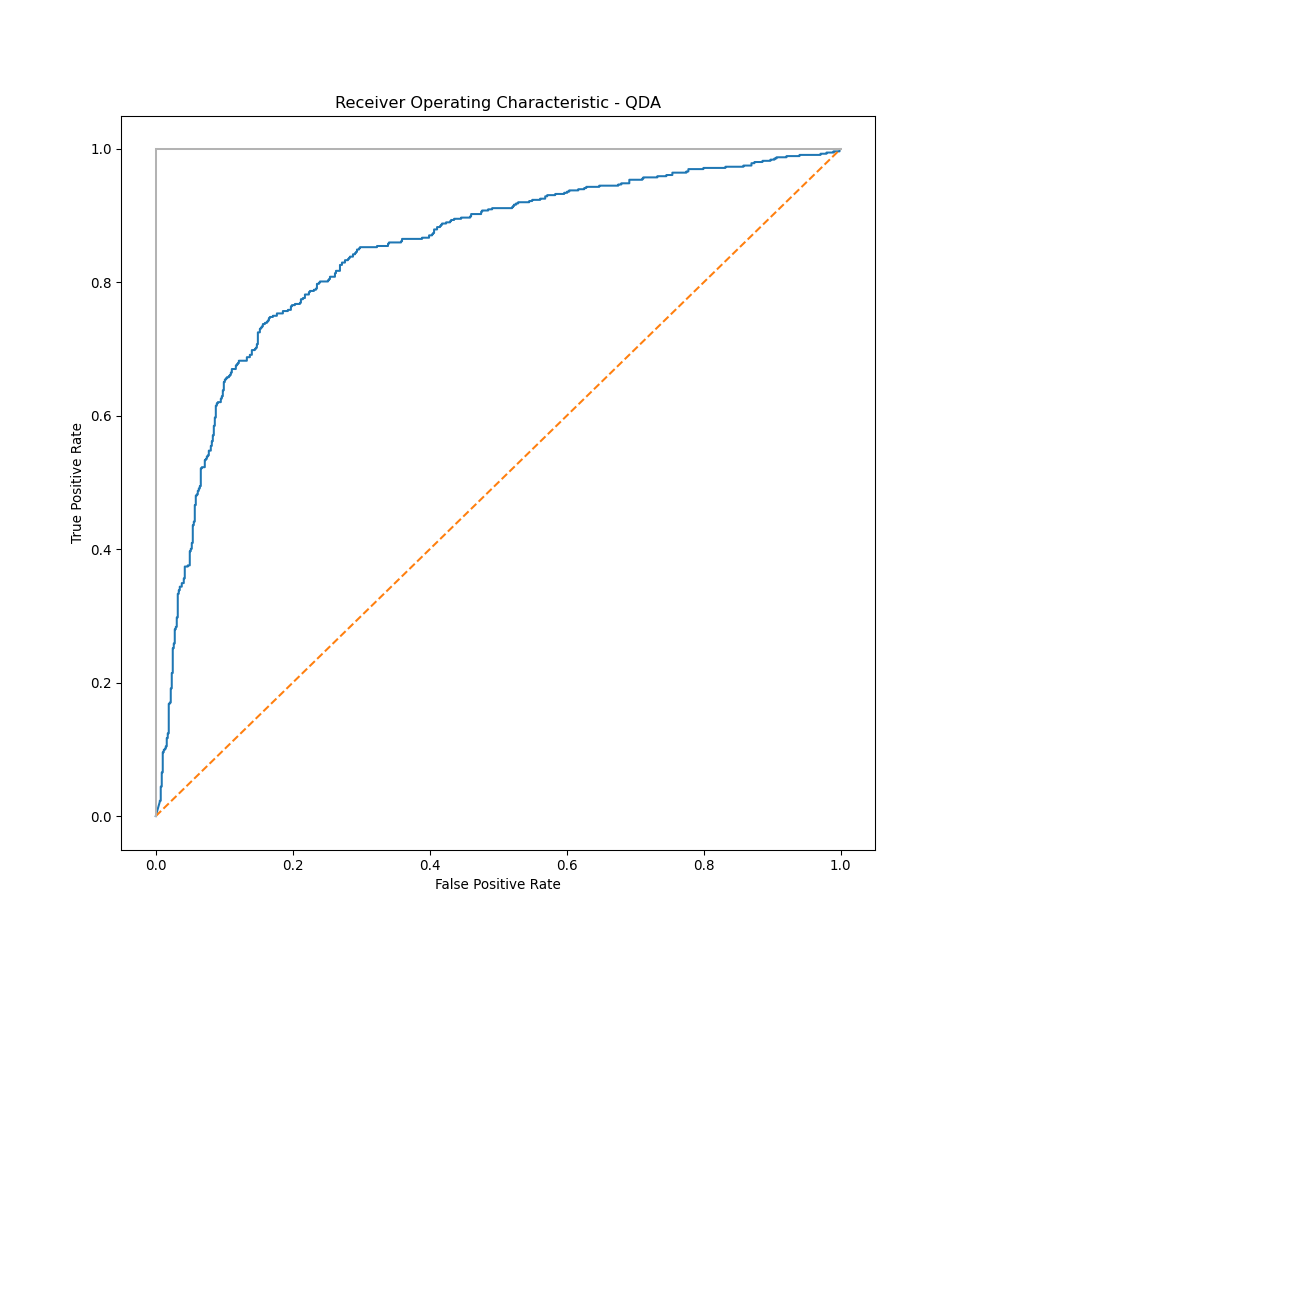

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = model_qda.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for QDA ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - QDA')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Decision Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import graphviz

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_airline, y_airline, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
score = dt.score(X_test, y_test)
print(score)

0.9110576923076923


In [79]:
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[648,  57],
       [ 54, 489]], dtype=int64)

In [80]:
y_pred=dt.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[648,  57],
       [ 54, 489]], dtype=int64)

In [81]:
# Hyperparameters tuning for Decision trees i.e max depth

In [82]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)
confusion_matrix(y_test, y_pred)

0.8717948717948718


array([[648,  57],
       [ 54, 489]], dtype=int64)

In [83]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)
confusion_matrix(y_test, y_pred)

0.8926282051282052


array([[648,  57],
       [ 54, 489]], dtype=int64)

In [84]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)
confusion_matrix(y_test, y_pred)

0.9110576923076923


array([[648,  57],
       [ 54, 489]], dtype=int64)

In [85]:
y_pred=dt.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[657,  48],
       [ 63, 480]], dtype=int64)

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9110576923076923
Precision: 0.9090909090909091


Roc_auc_score for Decision Tree  0.9565965283492027


<IPython.core.display.Javascript object>


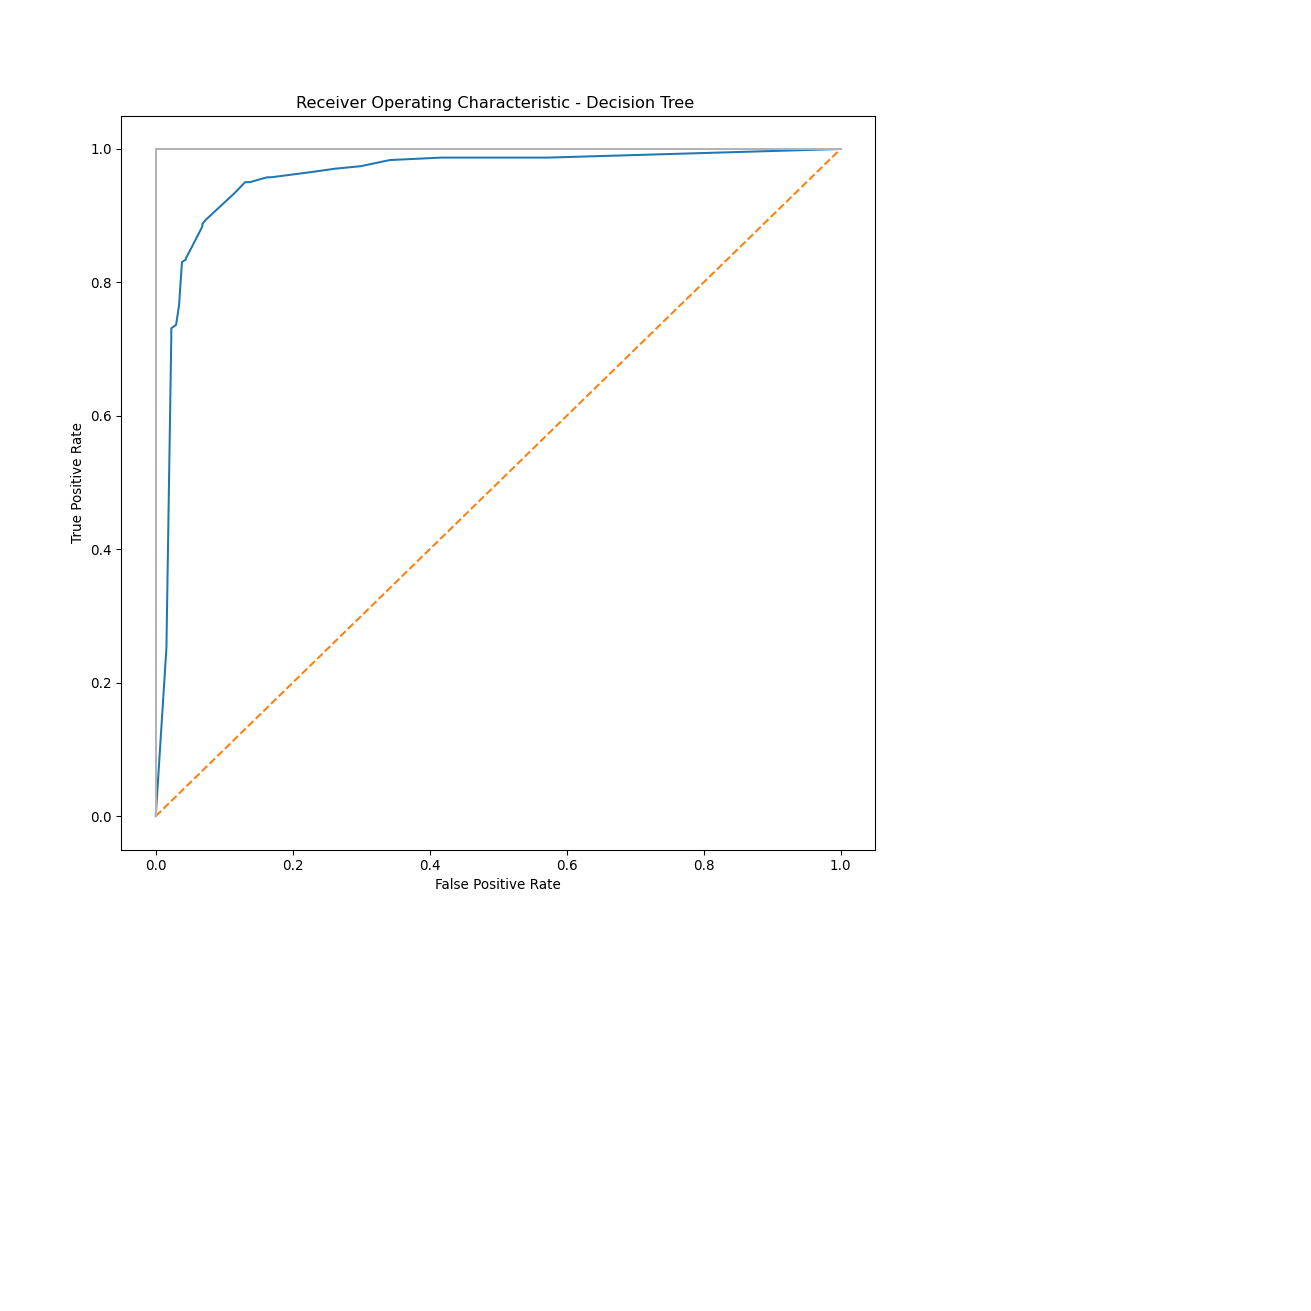

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = dt.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for Decision Tree ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
train_score = []
test_score = []
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    tr_score = clf.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = clf.score(X_test, y_test)
    test_score.append(te_score)
    accuracy.append(score)

<IPython.core.display.Javascript object>


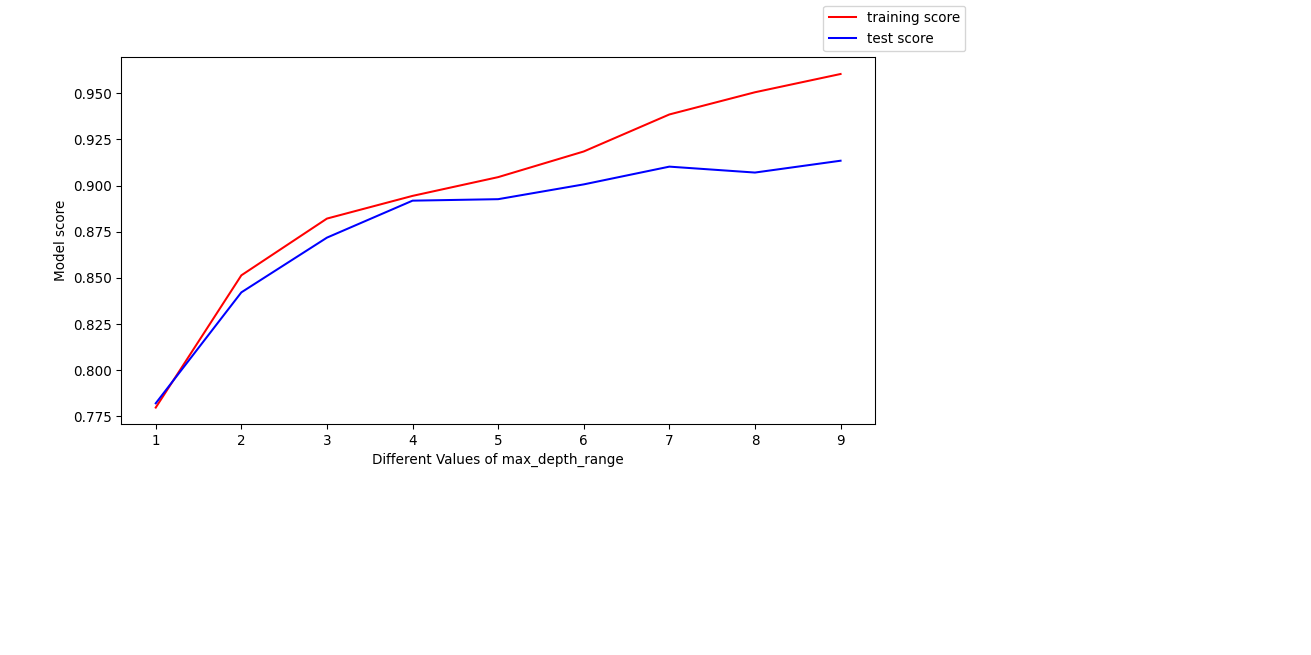

In [89]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth_range')
plt.ylabel('Model score')
plt.plot(max_depth_range, train_score, color = 'r', label = "training score")
plt.plot(max_depth_range, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [90]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
7,Online_boarding,0.391
2,Inflight_wifi_service,0.205
20,Type_of_Travel,0.139
9,Inflight_entertainment,0.039
13,Checkin_service,0.033
0,Age,0.028
19,Customer_Type,0.026
11,Leg_room_service,0.018
21,Business,0.015
8,Seat_comfort,0.013


#### Random Forest

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_model = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.9206730769230769

In [93]:
rf_model = RandomForestClassifier(max_depth=4,min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.8950320512820513

In [94]:
rf_model = RandomForestClassifier(max_depth=6,min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.9222756410256411

In [95]:
rf_model = RandomForestClassifier(max_depth=8,min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.9222756410256411

In [96]:
y_pred=rf_model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[664,  41],
       [ 56, 487]], dtype=int64)

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9222756410256411
Precision: 0.9223484848484849


Roc_auc_score for Random forest  0.9747711035356504


<IPython.core.display.Javascript object>


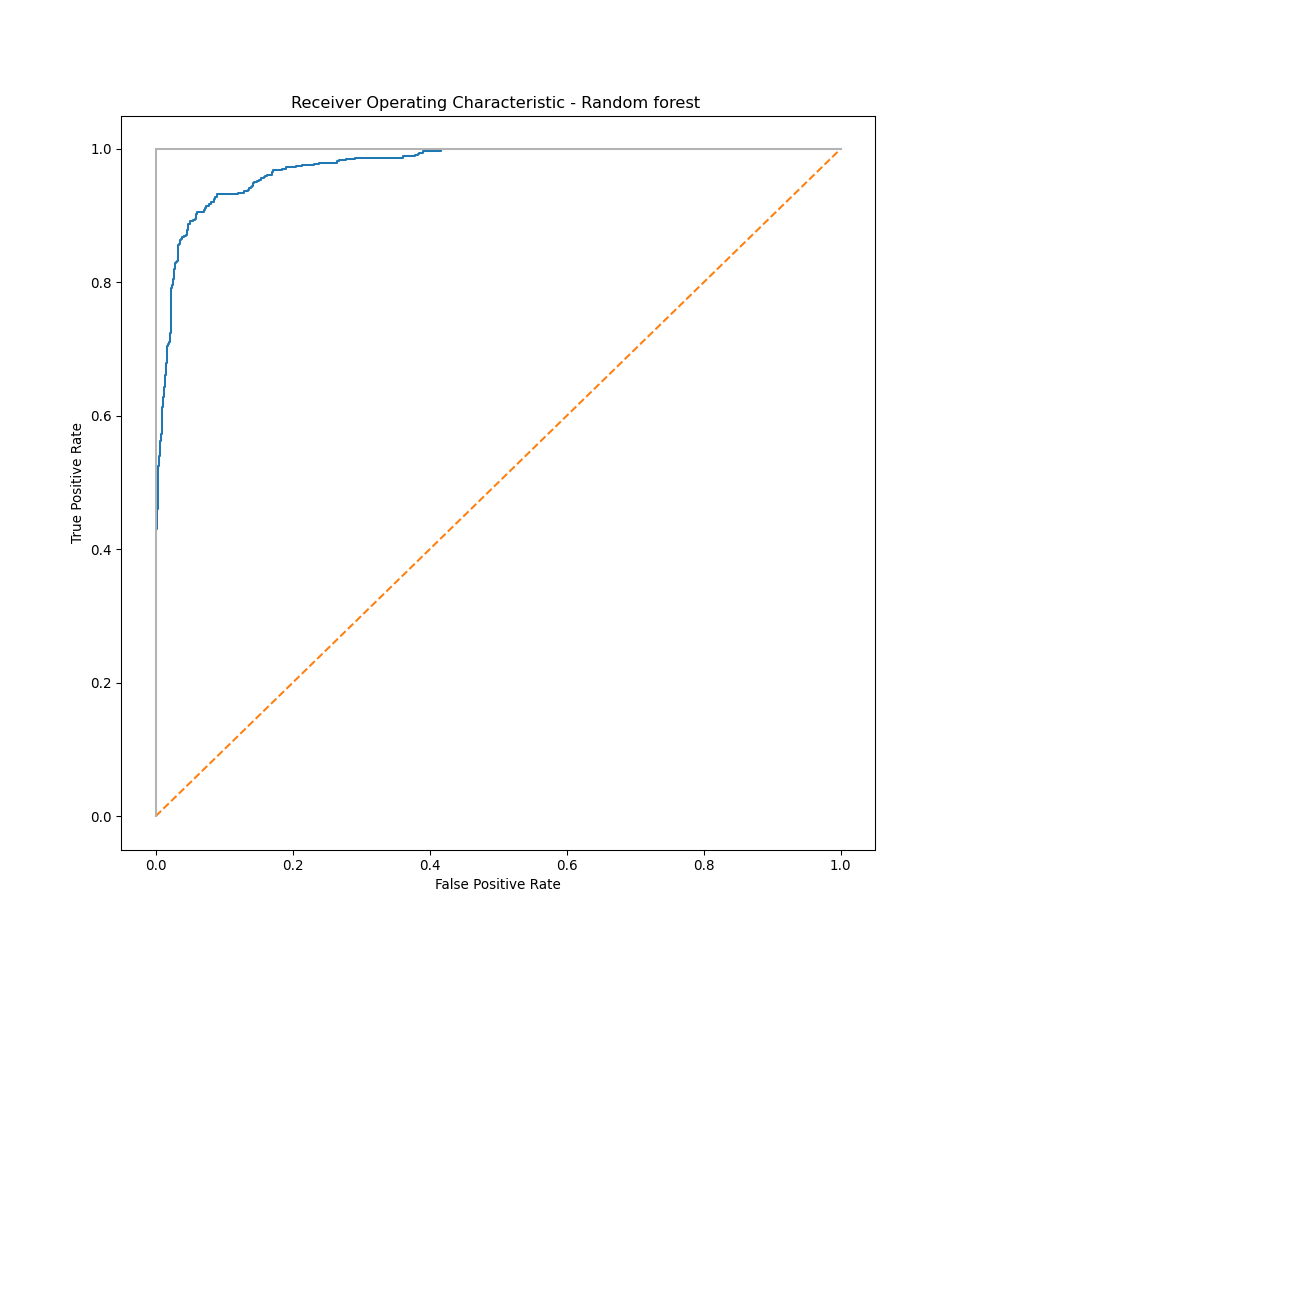

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

y_score2 = rf_model.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Roc_auc_score for Random forest ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random forest ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
train_score = []
test_score = []
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth,min_samples_split=2, random_state=0)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_test, y_test)
    
    tr_score = rf_model.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = rf_model.score(X_test, y_test)
    test_score.append(te_score)
    accuracy.append(score)

<IPython.core.display.Javascript object>


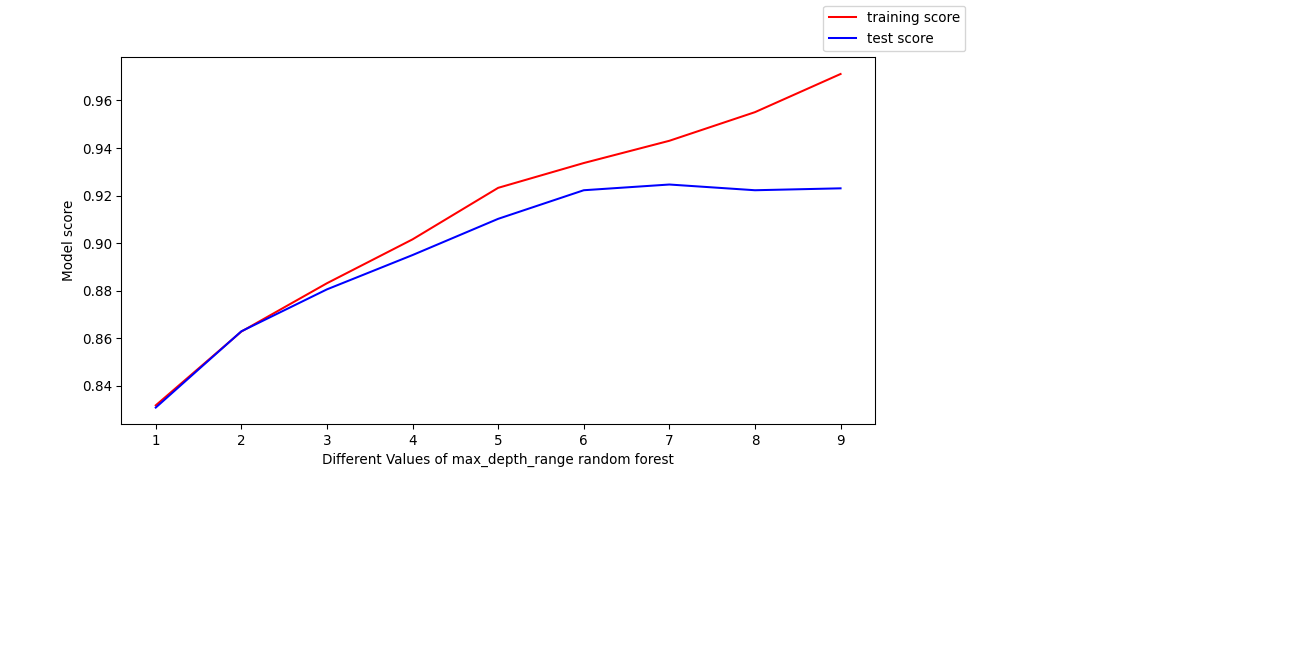

In [100]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth_range random forest')
plt.ylabel('Model score')
plt.plot(max_depth_range, train_score, color = 'r', label = "training score")
plt.plot(max_depth_range, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

# MODEL SELECTION VIA PCA AND CROSS VALIDATION

In [101]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_airline)
X_pca.shape

(4989, 17)

In [102]:
pca.explained_variance_ratio_

array([0.2 , 0.12, 0.12, 0.1 , 0.07, 0.05, 0.05, 0.05, 0.04, 0.03, 0.03,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.01])

In [103]:
pca.n_components_

17

In [104]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

#### LOGIT

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cv_scores = cross_val_score(model, X_pca, y,cv=5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.87 0.83 0.83 0.84 0.83]
Mean cross-validation score (5-fold): 0.842


In [107]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_pca)

log = LogisticRegression().fit(X_poly, y)

cv_scores = cross_val_score(log, X_poly, y,cv=5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.92 0.89 0.9  0.89 0.9 ]
Mean cross-validation score (5-fold): 0.900


<IPython.core.display.Javascript object>


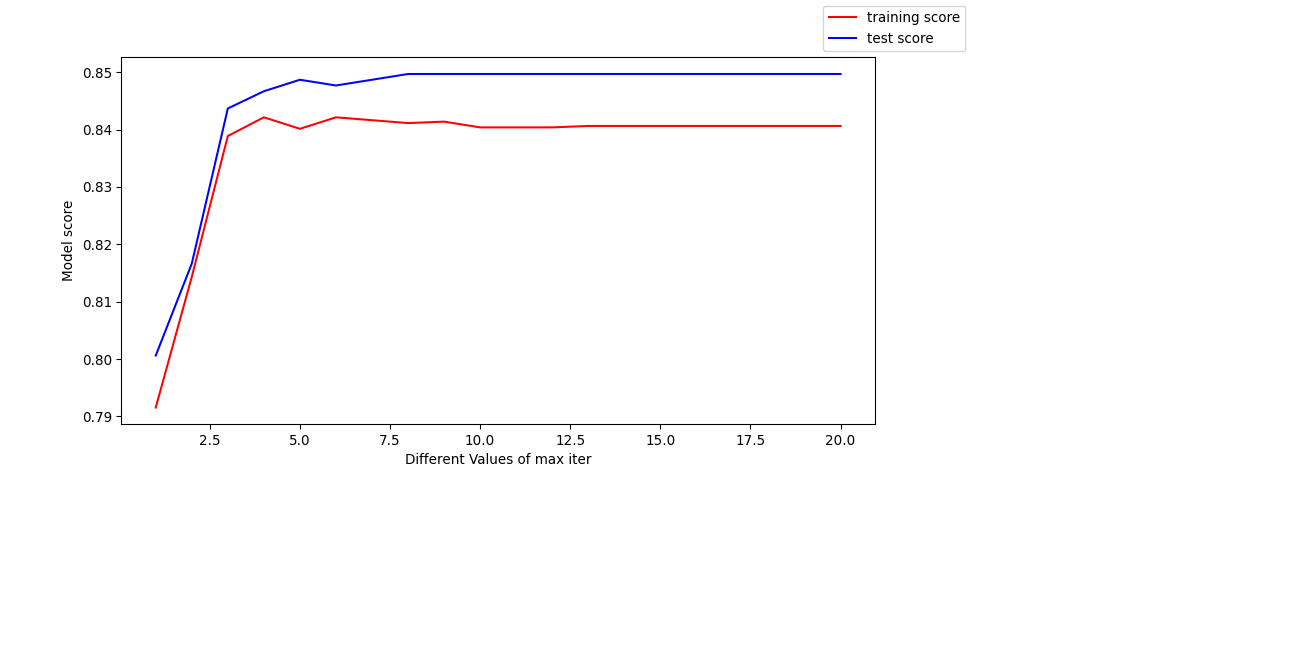

In [108]:
train_score = []
test_score = []
iter_vals = []

for i in range(1, 21):
    iter_vals.append(i)
    log = LogisticRegression(max_iter=i)
    log.fit(X_train_pca, y_train)
    
    tr_score = log.score(X_train_pca, y_train)
    train_score.append(tr_score)
    
    te_score = log.score(X_test_pca, y_test)
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max iter')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_pca)

log = LogisticRegression(max_iter=3).fit(X_poly, y)

cv_scores = cross_val_score(log, X_poly, y,cv=5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.86 0.82 0.86 0.85 0.86]
Mean cross-validation score (5-fold): 0.849


#### LDA

In [112]:
clf = LinearDiscriminantAnalysis() #LinearDiscriminantAnalysis
cv_scores = cross_val_score(clf, X_pca,y,cv=5)

print('Cross-validation scores :', cv_scores)
print('Mean cross-validation score : {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores : [0.86 0.83 0.83 0.84 0.83]
Mean cross-validation score : 0.840


#### KNN CLASIFIER

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
cv_scores = cross_val_score(clf, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.86 0.83 0.83 0.84 0.83]
Mean cross-validation score (5-fold): 0.840


In [115]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_pca, y_train)
    
    tr_score = knn.score(X_train_pca, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test_pca, y_test)
    test_score.append(te_score)

<IPython.core.display.Javascript object>


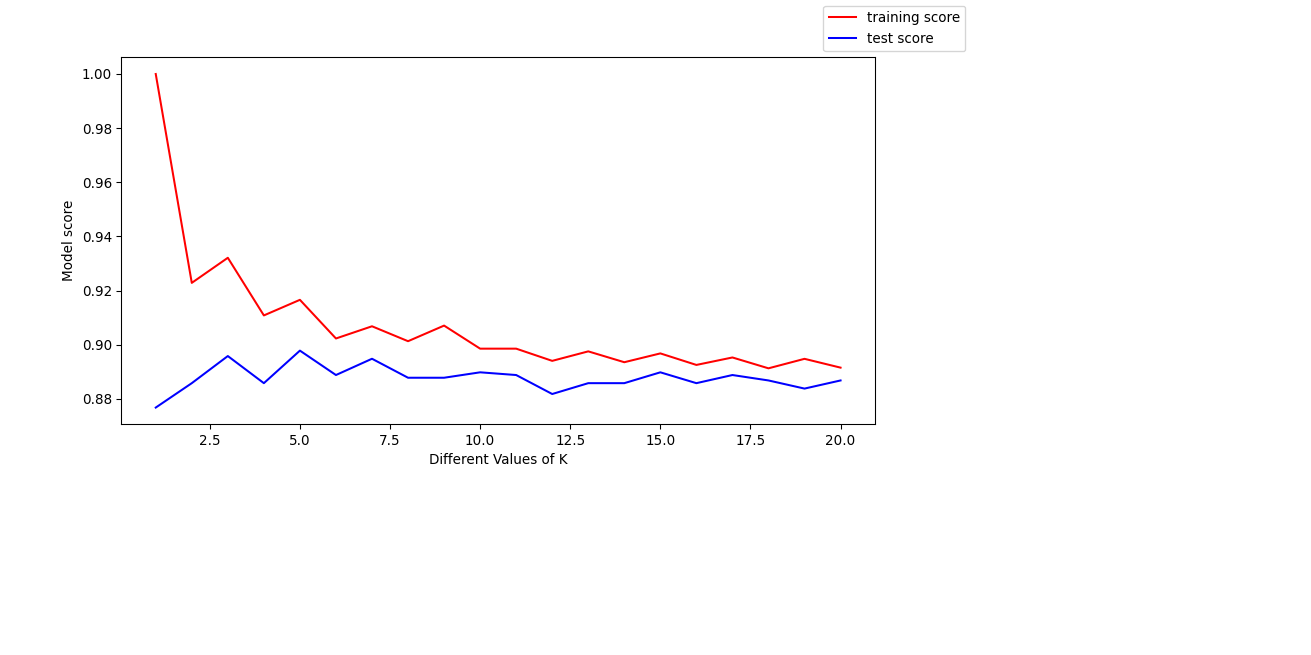

In [116]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
cv_scores = cross_val_score(clf, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.86 0.83 0.83 0.84 0.83]
Mean cross-validation score (5-fold): 0.840


#### Decision tree

In [118]:
dt = DecisionTreeClassifier()

cv_scores = cross_val_score(dt, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.85 0.8  0.83 0.85 0.81]
Mean cross-validation score (5-fold): 0.827


In [119]:
train_score = []
test_score = []
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    
    dt = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    dt.fit(X_train_pca, y_train)
    score = dt.score(X_test_pca, y_test)
    
    tr_score = dt.score(X_train_pca, y_train)
    train_score.append(tr_score)
    
    te_score = dt.score(X_test_pca, y_test)
    test_score.append(te_score)
    accuracy.append(score)

<IPython.core.display.Javascript object>


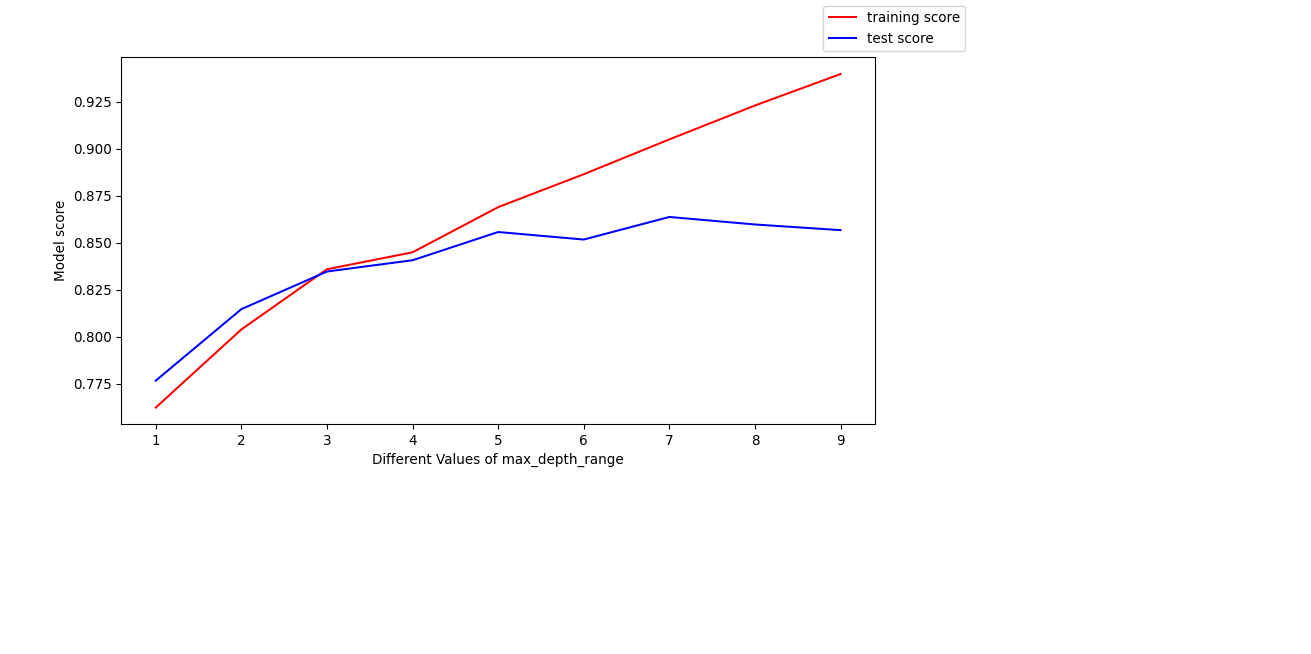

In [120]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth_range')
plt.ylabel('Model score')
plt.plot(max_depth_range, train_score, color = 'r', label = "training score")
plt.plot(max_depth_range, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [121]:
dt = DecisionTreeClassifier(max_depth=3)

cv_scores = cross_val_score(dt, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.84 0.82 0.85 0.8  0.83]
Mean cross-validation score (5-fold): 0.826


#### Random Forest 

In [122]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=2, random_state=0)
rf_model.fit(X_train_pca, y_train)

rf_model.score(X_test_pca, y_test)

0.8967935871743486

In [123]:
cv_scores = cross_val_score(rf_model, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.9  0.87 0.89 0.88 0.89]
Mean cross-validation score (5-fold): 0.889


In [124]:
train_score = []
test_score = []
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth,min_samples_split=2, random_state=0)
    rf_model.fit(X_train_pca, y_train)
    score = rf_model.score(X_test_pca, y_test)
    
    tr_score = rf_model.score(X_train_pca, y_train)
    train_score.append(tr_score)
    
    te_score = rf_model.score(X_test_pca, y_test)
    test_score.append(te_score)
    accuracy.append(score)

<IPython.core.display.Javascript object>


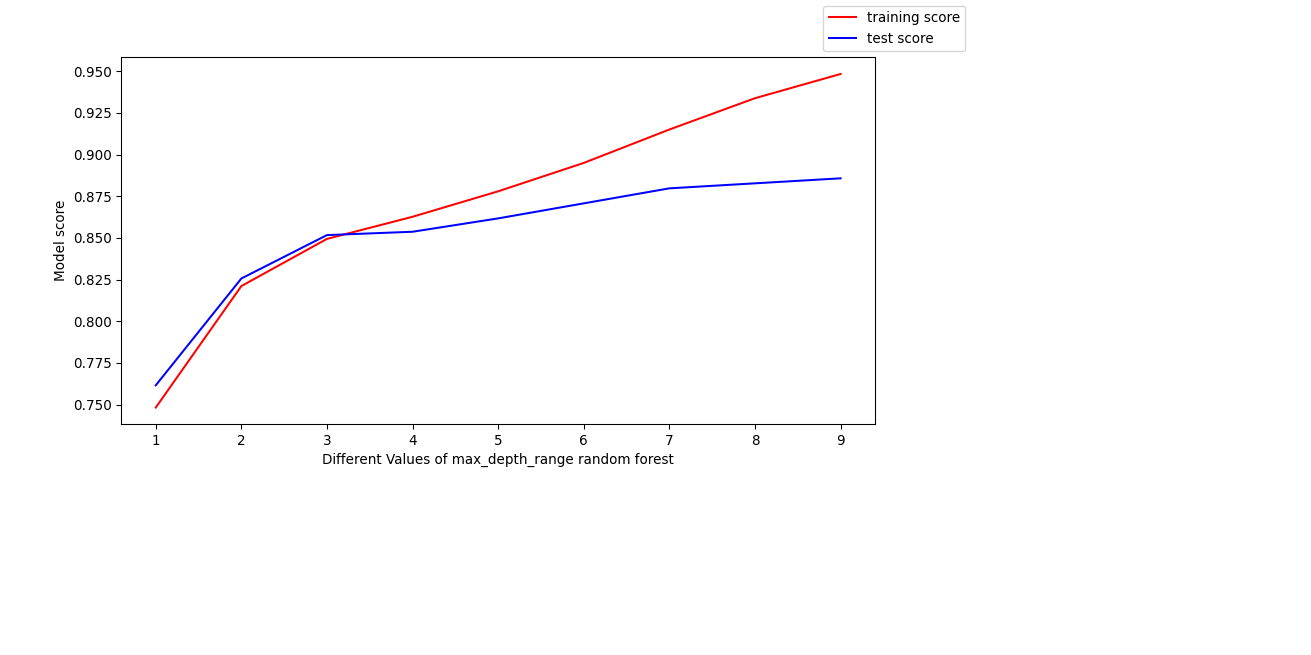

In [125]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth_range random forest')
plt.ylabel('Model score')
plt.plot(max_depth_range, train_score, color = 'r', label = "training score")
plt.plot(max_depth_range, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [126]:
rf_model = RandomForestClassifier(max_depth=3)
rf_model.fit(X_train_pca, y_train)

rf_model.score(X_test_pca, y_test)
cv_scores = cross_val_score(rf_model, X_pca, y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.85 0.82 0.84 0.82 0.82]
Mean cross-validation score (5-fold): 0.829
